In [4]:
#Importing the required dependencies
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score



import warnings
warnings.filterwarnings('ignore')



In [ ]:
import tensorflow as tf
tf.random.set_seed(100)
from keras import Sequential

In [ ]:
data = pd.read_csv('athlete_events.csv')
regions = pd.read_csv('/Users/seethamraju/Downloads/KBS_dataExploration/noc_regions.csv')

In [6]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [7]:
data.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [ ]:
#Joining the two dataframes
combined_df = pd.merge(data, regions, on = 'NOC', how = 'left')

In [6]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [72]:
combined_df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [73]:
#Women Athletes
women_athletes = combined_df[(combined_df['Sex'] == 'F') & (combined_df['Season'] == 'Summer')]
women_athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Netherlands,NaN
32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN
33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN
79,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold,Norway,NaN


In [74]:
#Women Athletes
women_athletes = combined_df[(combined_df['Sex'] == 'F') & (combined_df['Season'] == 'Summer')]
women_athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Netherlands,NaN
32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN
33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN
79,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold,Norway,NaN


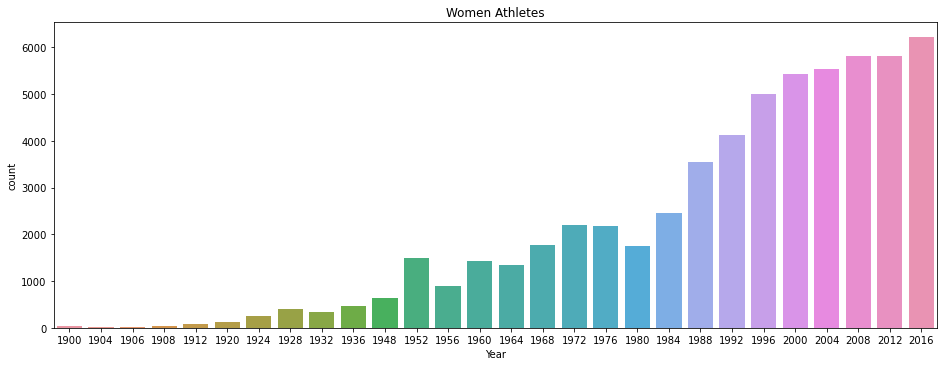

In [75]:
plt.figure(figsize = (13,5))
plt.title('Women Athletes')
plt.tight_layout()
sns.countplot(x = 'Year', data = women_athletes)
plt.show()

In [76]:
#Gold Medals for the top 10 countries
golds = combined_df[(combined_df['Medal'] == 'Gold')]
golds['region'].value_counts().reset_index(name = 'Medal').head(10)


,index,Medal
0,USA,2638
1,Russia,1599
2,Germany,1301
3,UK,678
4,Italy,575
5,France,501
6,Sweden,479
7,Canada,463
8,Hungary,432
9,Norway,378


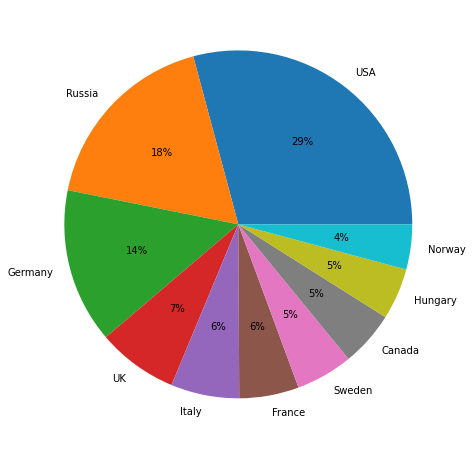

In [77]:
top10_country = total_golds.head(10)
plt.figure(figsize = (8,8))
plt.pie(top10_country['Medal'], labels=top10_country['index'], autopct='%.0f%%')
plt.show()

In [78]:
#Male vs Women Contribution Over Time
MaleAthletes = combined_df[['Year', 'Sex']][(combined_df['Sex'] == 'M') & (combined_df['Season'] == 'Summer')]
FemaleAthletes = combined_df[['Year','Sex']][(combined_df['Sex'] == 'F') & (combined_df['Season'] == 'Summer')]

In [79]:
v1 = MaleAthletes['Year'].value_counts().reset_index(name = 'Male_Count')
v2 = FemaleAthletes['Year'].value_counts().reset_index(name = 'Female_Count')

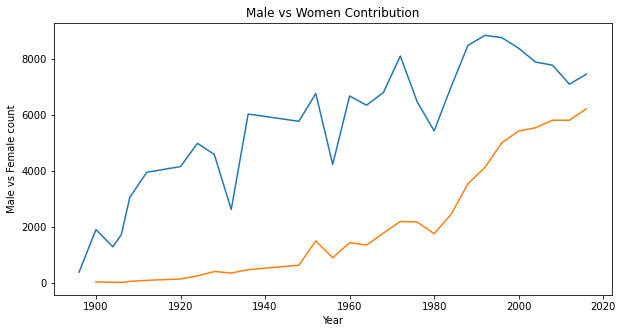

In [80]:
plt.figure(figsize = (10,5))
sns.lineplot(x = 'index', y = 'Male_Count', data  = v1)
sns.lineplot(x = 'index', y = 'Female_Count', data  = v2)
plt.title('Male vs Women Contribution')
plt.xlabel('Year')
plt.ylabel('Male vs Female count')
plt.show()

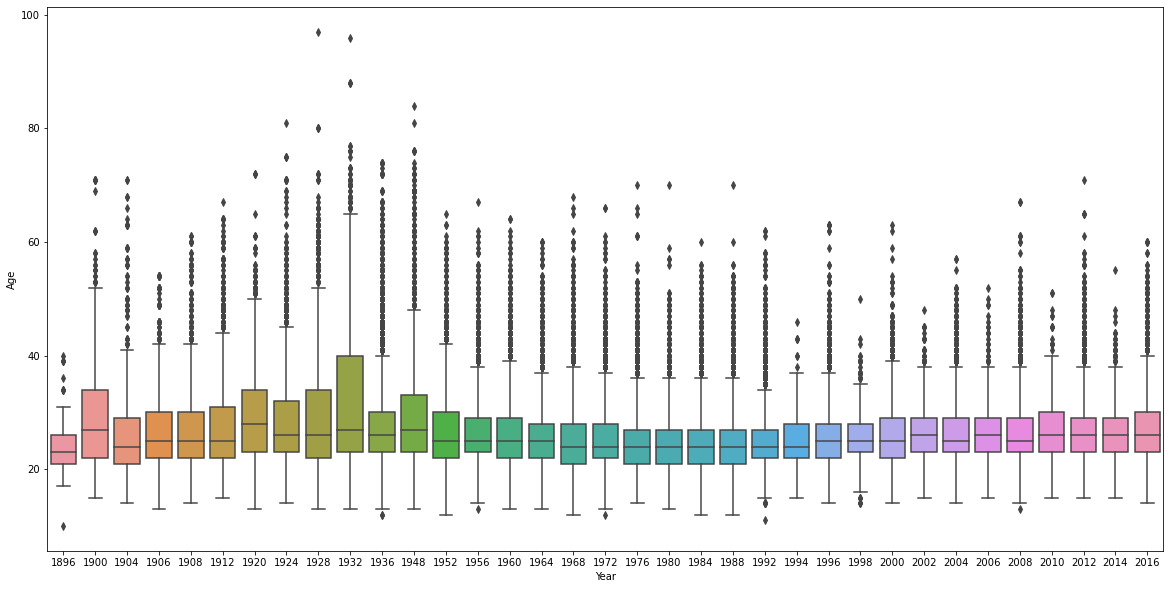

In [81]:
#Box Plot of Male Athletes vs Age
plt.figure(figsize = (20,10))
plt.tight_layout()
sns.boxplot(x = 'Year', y = 'Age' ,data = combined_df[combined_df['Sex']== 'M'])
plt.show()

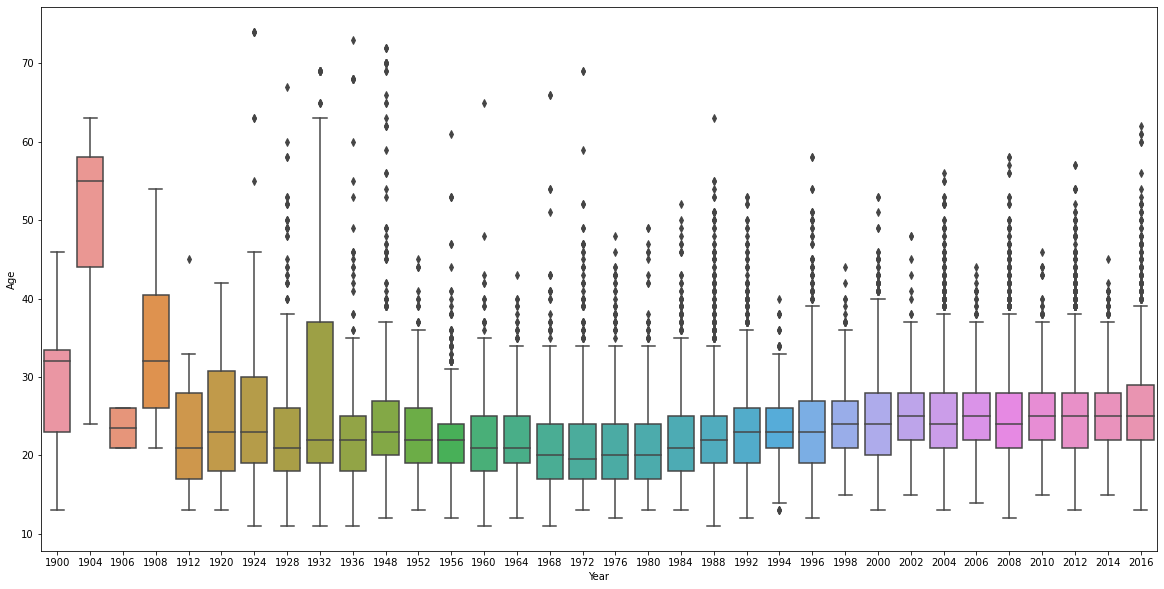

In [82]:
#Box Plot of Female Athletes vs Age
plt.figure(figsize = (20,10))
plt.tight_layout()
sns.boxplot(x = 'Year', y = 'Age', data = combined_df[combined_df['Sex'] == 'F'])
plt.show()

In [83]:
# male and female participants
gender_counts = combined_df.Sex.value_counts()
gender_counts

M    196594
F     74522
Name: Sex, dtype: int64

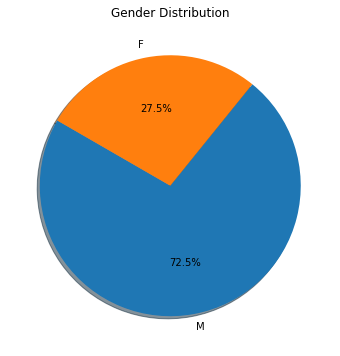

In [84]:
# pie chart for male and female participants
plt.figure(figsize=(12,6))
plt.pie(gender_counts,labels = gender_counts.index, autopct = '%1.1f%%',startangle=150,shadow=True )
plt.title('Gender Distribution')
plt.show()

In [85]:
# gold medals for USA
goldMedals_USA = golds.loc[golds['NOC'] == 'USA']
goldMedals_USA.Event.value_counts().reset_index(name='Medal').head(20)

,index,Medal
0,Basketball Men's Basketball,186
1,Swimming Men's 4 x 200 metres Freestyle Relay,111
2,Rowing Men's Coxed Eights,108
3,Swimming Men's 4 x 100 metres Medley Relay,108
4,Basketball Women's Basketball,95
5,Athletics Men's 4 x 400 metres Relay,81
6,Swimming Women's 4 x 100 metres Medley Relay,79
7,Swimming Women's 4 x 100 metres Freestyle Relay,78
8,Football Women's Football,66
9,Athletics Men's 4 x 100 metres Relay,63


In [8]:
data['Medal'] = data['Medal'].apply(lambda x: 1 if str(x) != 'nan' else 0)

In [9]:
#Data Cleaning
data = data.drop(['ID', 'Name', 'Games'], axis=1)

In [10]:
data.isna().mean()

Sex       0.000000
Age       0.034944
Height    0.221938
Weight    0.231912
Team      0.000000
NOC       0.000000
Year      0.000000
Season    0.000000
City      0.000000
Sport     0.000000
Event     0.000000
Medal     0.000000
dtype: float64

In [11]:
data.groupby(['Medal', 'Sex']).mean().astype(np.int)

Age  Height  Weight  Year
Medal Sex                           
0     F     23     167      59  1992
      M     26     178      75  1974
1     F     24     170      63  1992
      M     26     181      79  1966

In [12]:
# list of columns with null values 
missing_values_columns = [col for col in data.columns if data.isnull().sum()[col] > 0]
missing_values_columns

['Age', 'Height', 'Weight']

In [13]:
for column in ['Age', 'Height', 'Weight']:
    data[column] = data.groupby(['Medal', 'Sex'])[column].apply(lambda x: x.fillna(x.mean()).astype(np.int))
print("Total missing values:", data.isna().sum().sum())

Total missing values: 0


In [14]:
#Encoding
{column: len(data[column].unique()) for column in data.select_dtypes('object').columns}

{'Sex': 2,
 'Team': 1184,
 'NOC': 230,
 'Season': 2,
 'City': 42,
 'Sport': 66,
 'Event': 765}

In [15]:
def binary_encode(df, columns, positive_values):
    df = df.copy()
    for column, positive_value in zip(columns, positive_values):
        df[column] = df[column].apply(lambda x: 1 if x == positive_value else 0)
    return df

def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [16]:
data = binary_encode(
    data,
    columns=['Sex', 'Season'],
    positive_values=['M', 'Summer']
)

data = onehot_encode(
    data,
    columns=['Team', 'NOC', 'City', 'Sport', 'Event'],
    prefixes=['T', 'N', 'C', 'S', 'E']
)

In [17]:
print("Remaining non-numeric columns:", len(data.select_dtypes('object').columns))

Remaining non-numeric columns: 0


In [18]:
#Splitting and Scaling
y = data['Medal'].copy()
X = data.drop('Medal', axis=1).copy()

In [19]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [21]:
#Training
X.shape

(271116, 2293)

In [20]:
print("Class Distribution (Positive to Negative): {:.1f}% / {:.1f}%".format(y_train.mean() * 100, (1 - y_train.mean()) * 100))

Class Distribution (Positive to Negative): 14.7% / 85.3%


In [23]:
inputs = tf.keras.Input(shape=(X.shape[1]))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(inputs, outputs)


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)


history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(http://localhost:8888/notebooks/Downloads/KBS_Project/KBS_Olympics%20(1).ipynb#
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
4745/4745 [==============================] - 17s 2ms/step - loss: 0.3302 - accuracy: 0.8735 - auc: 0.8067 - val_loss: 0.3005 - val_accuracy: 0.8840 - val_auc: 0.8400
Epoch 2/100
4745/4745 [==============================] - 12s 3ms/step - loss: 0.2759 - accuracy: 0.8941 - auc: 0.8691 - val_loss: 0.2762 - val_accuracy: 0.8972 - val_auc: 0.8659
Epoch 3/100
4745/4745 [==============================] - 13s 3ms/step - loss: 0.2474 - accuracy: 0.9060 - auc: 0.8954 - val_loss: 0.2587 - val_accuracy: 0.9046 - val_auc: 0.8815
Epoch 4/100
4745/4745 [==============================] - 9s 2ms/step - loss: 0.2257 - accuracy: 0.9133 - auc: 0.9144 - val_loss: 0.2534 - val_accuracy: 0.9091 - val_auc: 0.8873
Epoch 5/100
4745/4745 [==============================] - 8s 2ms/step - loss: 0.2082 - accuracy: 0.9206 - auc: 0.9278 - val_loss: 0.2518 - val_accuracy: 0.9102 - val_auc: 0.8915
Epoch 6/100
4745/4745 [==============================] - 10s 2ms/step - loss: 0.1940 - accuracy: 0.9255 - auc: 0

In [27]:
model= LogisticRegression()

In [29]:
train, test = train_test_split(data, test_size=0.2)

In [31]:

model.fit(X_train, y_train)



LogisticRegression()

In [36]:
X_train_prediction = model.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction, y_train)

In [37]:
print(training_data_accuray)

0.8676843308866535


In [39]:
X_test_prediction = model.predict(X_test)
testing_data_accuray = accuracy_score(X_test_prediction, y_test)

In [40]:
print(testing_data_accuray)

0.8662568389992008


In [41]:
Y_pred = model.predict(X_test)
report = classification_report(y_test, Y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.98      0.93     69458
           1       0.66      0.18      0.28     11877

    accuracy                           0.87     81335
   macro avg       0.77      0.58      0.60     81335
weighted avg       0.84      0.87      0.83     81335



In [22]:
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training data
knn.fit(X_train, y_train)

# Predict the labels of the training and test data

KNeighborsClassifier(n_neighbors=3)

In [23]:
X_train_prediction = knn.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction, y_train)

In [24]:
print(training_data_accuray)

0.9564919565183027


In [25]:
X_test_prediction = knn.predict(X_test)
testing_data_accuray = accuracy_score(X_test_prediction, y_test)

In [26]:
print(training_data_accuray)

0.9564919565183027


In [ ]:
clf = svm.SVC(kernel='linear')

# Train the classifier on the training data


In [ ]:
clf.fit(X_train, y_train)
# Predict the labels of the training and test data
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)